In [38]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [39]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar100.load_data()

print('Training data shape : ', train_x.shape, train_y.shape)
print('Testing data shape : ', test_x.shape, test_y.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [40]:
# Find the unique numbers from the train labels
classes = np.unique(train_y)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  100
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


(-0.5, 31.5, 31.5, -0.5)

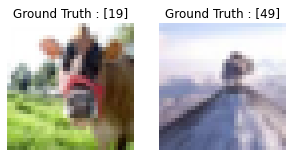

In [41]:
plt.figure(figsize=[5,2.5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='copper')
plt.title("Ground Truth : {}".format(train_y[0]))
plt.axis("off")

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='copper')
plt.title("Ground Truth : {}".format(test_y[0]))
plt.axis("off")


In [42]:
# Change the labels from integer to categorical data
train_y_one_hot = keras.utils.to_categorical(train_y)
test_y_one_hot = keras.utils.to_categorical(test_y) 
train_y_one_hot.shape

(50000, 100)

In [43]:
train_x.shape

(50000, 32, 32, 3)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [45]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))

model.add(Conv2D(32, (3, 3), activation='relu',
kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',
kernel_initializer='he_uniform', padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu',
kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu',
kernel_initializer='he_uniform', padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu',
kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))
# compile model
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy',
metrics=['accuracy'])
#fit model
history = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=64,
validation_data=(test_x, test_y_one_hot), verbose=1)

Epoch 1/30
782/782 [==============================] - 214s 271ms/step - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 2/30
782/782 [==============================] - 203s 260ms/step - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 3/30
782/782 [==============================] - 202s 258ms/step - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 4/30
782/782 [==============================] - 161s 206ms/step - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 5/30
782/782 [==============================] - 173s 221ms/step - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 6/30
782/782 [==============================] - 169s 217ms/step - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 7/30
782/782 [==============================] - 170s 217ms/step - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 8/30
782/782 [

In [46]:
model = Sequential ()

model.add (Conv2D(32, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform' ,
padding= 'same', input_shape= (32, 32, 3)))

model.add (BatchNormalization ())
model.add (Conv2D(32, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform' ,
padding= 'same'))

model.add (BatchNormalization ())
model.add (MaxPooling2D ((2, 2)))
model.add (Dropout(0.2))
model.add (Conv2D(64, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform' ,
padding= 'same'))

model.add (BatchNormalization ())
model.add (Conv2D(64, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform' ,
padding= 'same'))
model.add (BatchNormalization ())
model.add (MaxPooling2D ((2, 2)))
model.add (Dropout(0.3))
model.add (Conv2D(128, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform' ,
padding= 'same'))

model.add (BatchNormalization ())
model.add (Conv2D(128, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform' ,
padding= 'same'))

model.add (BatchNormalization ())
model.add (MaxPooling2D ((2, 2)))
model.add (Dropout(0.4))
model.add (Flatten())
model.add (Dense(128, activation= 'relu', kernel_initializer= 'he_uniform' ))

model.add (BatchNormalization ())
model.add (Dropout(0.5))
model.add (Dense(10, activation= 'softmax' ))
